In [32]:
# Importing lib's
import pandas as pd
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
import time
import datetime
from dateutil.parser import parse

In [113]:
df = pd.read_csv('Desktop/movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
# cleaning dataset
# let's check missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing}%')

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [8]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [9]:
# let's remove the missing values
df_v2 = df.copy()
df_v2 = df_v2.dropna()

In [10]:
df_v2.isnull().sum() # there we go !

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [13]:
# data types
df_v2.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [19]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   int64  
 12  gross     5421 non-null   int64  
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 677.6+ KB


In [18]:
df_v2.describe()

,year,score,votes,budget,gross,runtime
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [16]:
# change data type of columns
df_v2['budget'] = df_v2['budget'].astype('int64')
df_v2['gross'] = df_v2['gross'].astype('int64')

In [21]:
df_v2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [24]:
# creating modified year column for better understanding
df_v2['yearcorrect'] = df_v2['released'].astype(str).str[:-16]

In [45]:
df_v2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980"


In [57]:
# top 10 highest grossing movies
df_v2.sort_values(by=['gross'], inplace=False, ascending=False).head(10) 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"December 18, 2009",1982-10-22
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"April 26, 2019",1982-10-22
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"December 19, 1997",1982-10-22
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015",1982-10-22
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018",1982-10-22
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,"July 19, 2019",1982-10-22
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,"June 12, 2015",1982-10-22
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,"May 4, 2012",1982-10-22
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,"April 3, 2015",1982-10-22
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,"November 22, 2019",1982-10-22


In [58]:
# drop released column
df_v2 = df_v2.drop(['released'], axis=1)

In [59]:
df_v2.head(1)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,year_correct
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",1982-10-22


In [60]:
# hypothesis 
# 1. budget high correlation
# 2. company high correlation

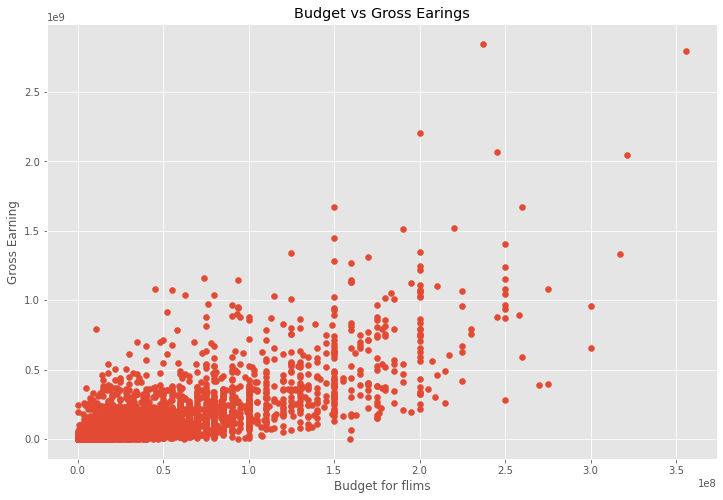

In [88]:
# scatter plot with budget vs gross
plt.scatter(x=df_v2['budget'], y=df_v2['gross'])
plt.title('Budget vs Gross Earings')
plt.xlabel('Budget for flims')
plt.ylabel('Gross Earning')
plt.show()

Text(0, 0.5, 'Gross Earning')

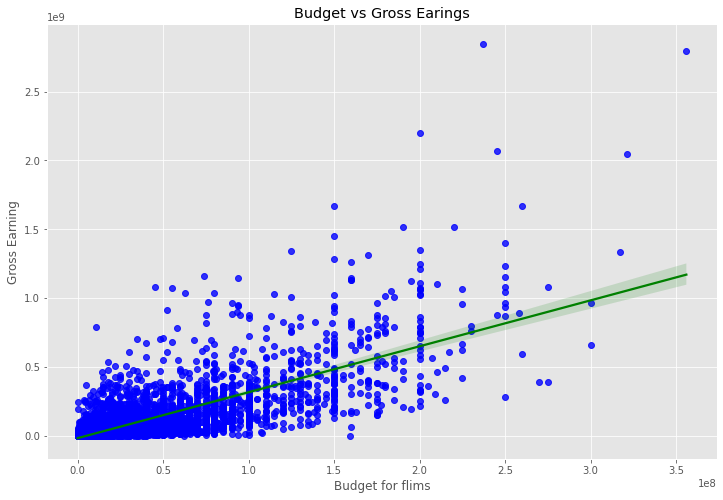

In [102]:
# plot budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df_v2, scatter_kws={'color':'blue'}, line_kws={'color':'green'})
plt.title('Budget vs Gross Earings')
plt.xlabel('Budget for flims')
plt.ylabel('Gross Earning')

In [75]:
# there is a positive correlation

In [82]:
df_v2.corr(method='pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [83]:
# high correlation between budget and gross

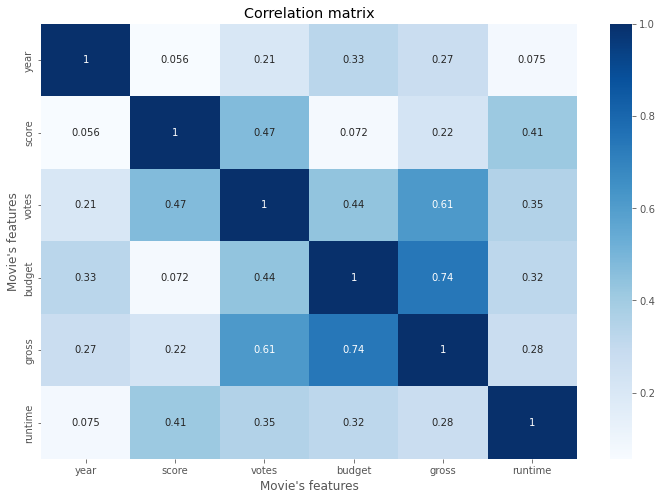

In [93]:
correlation_matrix = df_v2.corr()
sns.heatmap(correlation_matrix, annot=True,cmap="Blues")
plt.title('Correlation matrix')
plt.xlabel("Movie's features")
plt.ylabel("Movie's features")
plt.show()

In [94]:
# looking at company

In [95]:
df_v2.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,year_correct
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",1982-10-22
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",1982-10-22
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",1982-10-22
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",1982-10-22
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",1982-10-22


In [96]:
# in order to find correlation of different companies we to numerize them (ignore the spelling!)

In [99]:
df_numerized = df_v2

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,year_correct
0,4692,6,6,1980,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1258,1982-10-22
1,3929,6,1,1980,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1087,1982-10-22
2,3641,4,0,1980,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1310,1982-10-22
3,204,4,4,1980,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1087,1982-10-22
4,732,6,4,1980,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1128,1982-10-22


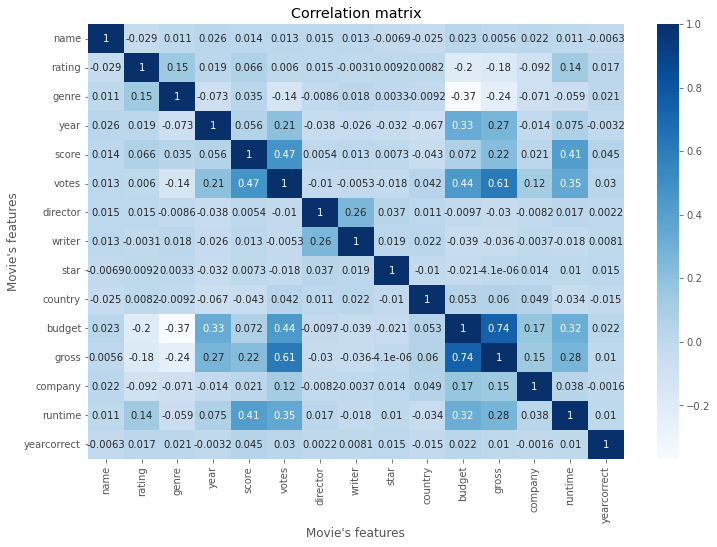

In [101]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True,cmap="Blues")
plt.title('Correlation matrix')
plt.xlabel("Movie's features")
plt.ylabel("Movie's features")
plt.show()

In [104]:
# unstacking correlation
pd.set_option('display.max_rows', None)
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect   -0.006313
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
             budget        -0.203946
             gross         -0.181906
 

In [107]:
sorted_pairs = corr_pairs.sort_values(ascending=False)
sorted_pairs

name         name           1.000000
rating       rating         1.000000
runtime      runtime        1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
year         year           1.000000
genre        genre          1.000000
writer       writer         1.000000
yearcorrect  yearcorrect    1.000000
budget       gross          0.740247
gross        budget         0.740247
votes        gross          0.614751
gross        votes          0.614751
votes        score          0.474256
score        votes          0.474256
votes        budget         0.439675
budget       votes          0.439675
score        runtime        0.414068
runtime      score          0.414068
             votes          0.352303
votes        runtime        0.352303
y

In [111]:
high_corr = sorted_pairs[(sorted_pairs) > 0.4].sort_values()
high_corr

runtime      score          0.414068
score        runtime        0.414068
budget       votes          0.439675
votes        budget         0.439675
score        votes          0.474256
votes        score          0.474256
gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
yearcorrect  yearcorrect    1.000000
writer       writer         1.000000
name         name           1.000000
score        score          1.000000
votes        votes          1.000000
director     director       1.000000
star         star           1.000000
country      country        1.000000
budget       budget         1.000000
gross        gross          1.000000
company      company        1.000000
runtime      runtime        1.000000
rating       rating         1.000000
year         year           1.000000
genre        genre          1.000000
dtype: float64

In [112]:
# votes and budget have high correlation
# votes and gross have high correlation
# company has low correlation